In [1]:
%matplotlib inline

import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

import utils

tracks = utils.load('Data/fma_metadata/tracks.csv')
genres = utils.load('Data/fma_metadata/genres.csv')
features = utils.load('Data/fma_metadata/features.csv')


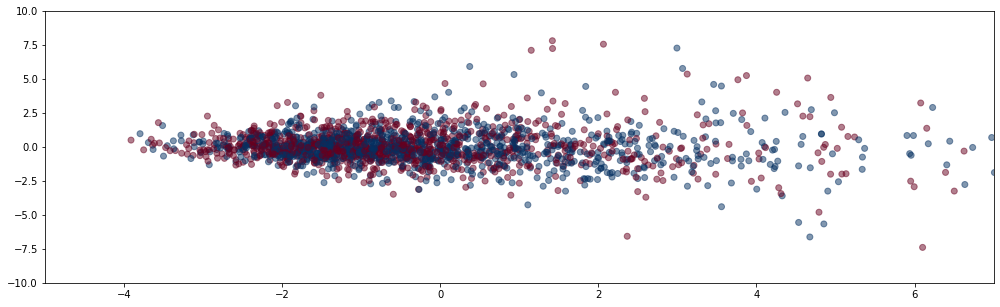

In [12]:
plt.rcParams['figure.figsize'] = (17, 5)

small = tracks['set', 'subset'] <= 'small'
genres_label = ['Rock', 'Hip-Hop']
genre1 = tracks['track', 'genre_top'] == genres_label[0]
genre2 = tracks['track', 'genre_top'] == genres_label[1]

X = features.loc[small & (genre1 | genre2), 'chroma_cens']
X = skl.decomposition.PCA(n_components=2).fit_transform(X)

y = tracks.loc[small & (genre1 | genre2), ('track', 'genre_top')]
y = skl.preprocessing.LabelEncoder().fit_transform(y)


plt.scatter(X[:,0], X[:,1], c=y, cmap='RdBu', alpha=0.5)
plt.xlim(-5, 7)
plt.ylim(-10,10)
plt.show()

C:\Anaconda\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


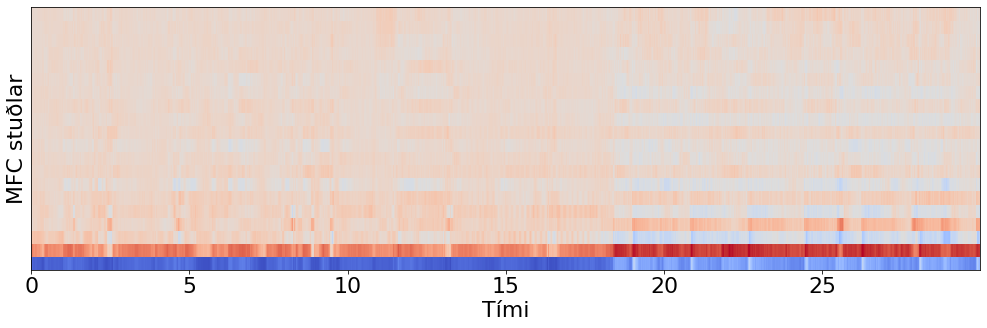

In [4]:
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams.update({'font.size': 22})
x, sr = librosa.load('Data/fma_small/000/000141.mp3', sr=None, mono=True)

stft = np.abs(librosa.stft(x, n_fft=2048, hop_length=512))
mel = librosa.feature.melspectrogram(sr=sr, S=stft**2)

mfcc = librosa.feature.mfcc(S=librosa.power_to_db(mel), n_mfcc=20)
mfcc = skl.preprocessing.StandardScaler().fit_transform(mfcc)


librosa.display.specshow(mfcc, sr=sr, x_axis = 'time');
plt.xlabel('Tími')
plt.ylabel('MFC stuðlar')
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('mfcc_studlar.png', format='png', dpi = 600)
plt.show()